In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

c:\miniforge3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("snowflake_vol_pull_1202.csv")
df

,MONTHLY,ENTITY,HFM_ACCOUNT,GENESIS_ACCOUNT,EPBCS_ACCOUNT,UNITS
0,2024-09-01,1202,A90370,903610,Visits Tests Laboratory,5281.00
1,2024-09-01,1202,A90370,903610,Visits Tests Urology,432.00
2,2024-09-01,1202,A90360,903600,Events Surgery OP Level 7,61.00
3,2024-09-01,1202,A92610,902600,Events Surgery C-Sections,61.00
4,2024-09-01,1202,A90210,902900,Patient Days Medical Surgical Gynecology,48.00
...,...,...,...,...,...,...
3201,2019-05-01,1202,A90530,902901,Cases Admissions Acute Other,4.00
3202,2019-01-01,1202,A90530,902901,Cases Admissions Acute Other,0.00
3203,2019-01-01,1202,A90163,901631,RVU Total,1.42
3204,2019-01-01,1202,A90210,902900,Patient Days Other,0.00


In [3]:
df = df[df['HFM_ACCOUNT'] == 'A90210']
df

,MONTHLY,ENTITY,HFM_ACCOUNT,GENESIS_ACCOUNT,EPBCS_ACCOUNT,UNITS
4,2024-09-01,1202,A90210,902900,Patient Days Medical Surgical Gynecology,48.0
25,2024-09-01,1202,A90210,902900,Patient Days Other,26.0
28,2024-09-01,1202,A90210,902900,Patient Days Oncology,159.0
34,2024-09-01,1202,A90210,902900,Patient Days Intensive Care Unit,844.0
35,2024-09-01,1202,A90210,902900,Patient Days NICU,579.0
...,...,...,...,...,...,...
3196,2019-06-01,1202,A90210,902900,Patient Days Obstetrics,885.0
3198,2019-05-01,1202,A90210,902900,Patient Days Other,28.0
3199,2019-05-01,1202,A90210,902900,Patient Days Intensive Care Unit,35.0
3200,2019-05-01,1202,A90210,902900,Patient Days General,2.0


In [4]:
df = df[['MONTHLY', 'ENTITY', 'HFM_ACCOUNT', 'UNITS']]
df['MONTHLY'] = pd.to_datetime(df['MONTHLY'])
df = pd.DataFrame(df.groupby(['MONTHLY', 'ENTITY', 'HFM_ACCOUNT'])['UNITS'].sum()).reset_index()
df

C:\Users\jesse.curran\AppData\Local\Temp\ipykernel_35140\3082585764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTHLY'] = pd.to_datetime(df['MONTHLY'])


,MONTHLY,ENTITY,HFM_ACCOUNT,UNITS
0,2019-01-01,1202,A90210,0.0
1,2019-05-01,1202,A90210,65.0
2,2019-06-01,1202,A90210,6678.0
3,2019-07-01,1202,A90210,12487.0
4,2019-08-01,1202,A90210,12110.0
...,...,...,...,...
61,2024-05-01,1202,A90210,10585.0
62,2024-06-01,1202,A90210,9803.0
63,2024-07-01,1202,A90210,10733.0
64,2024-08-01,1202,A90210,10765.0


In [5]:
df = df[['MONTHLY','UNITS']]
df

,MONTHLY,UNITS
0,2019-01-01,0.0
1,2019-05-01,65.0
2,2019-06-01,6678.0
3,2019-07-01,12487.0
4,2019-08-01,12110.0
...,...,...
61,2024-05-01,10585.0
62,2024-06-01,9803.0
63,2024-07-01,10733.0
64,2024-08-01,10765.0


In [6]:
# exclude half of sept data
df = df.iloc[:-1]

In [7]:
# last 3 months to compare at end !
df_last3 = df.tail(3)
df_last3

,MONTHLY,UNITS
62,2024-06-01,9803.0
63,2024-07-01,10733.0
64,2024-08-01,10765.0


In [8]:
df_last3['MONTHLY'] = pd.to_datetime(df_last3['MONTHLY'])
#df['MONTHLY'] = df['MONTHLY'].dt.month

C:\Users\jesse.curran\AppData\Local\Temp\ipykernel_35140\2066745577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last3['MONTHLY'] = pd.to_datetime(df_last3['MONTHLY'])


In [9]:
df_last3

,MONTHLY,UNITS
62,2024-06-01,9803.0
63,2024-07-01,10733.0
64,2024-08-01,10765.0


In [10]:
# new dataframe to build model on, excludes covid and last 3 months to compare against real values
df = df.iloc[14:-4]
df

,MONTHLY,UNITS
14,2020-06-01,10836.0
15,2020-07-01,11740.0
16,2020-08-01,11297.0
17,2020-09-01,11707.0
18,2020-10-01,11817.0
19,2020-11-01,11159.0
20,2020-12-01,11204.0
21,2021-01-01,11561.0
22,2021-02-01,10199.0
23,2021-03-01,11175.0


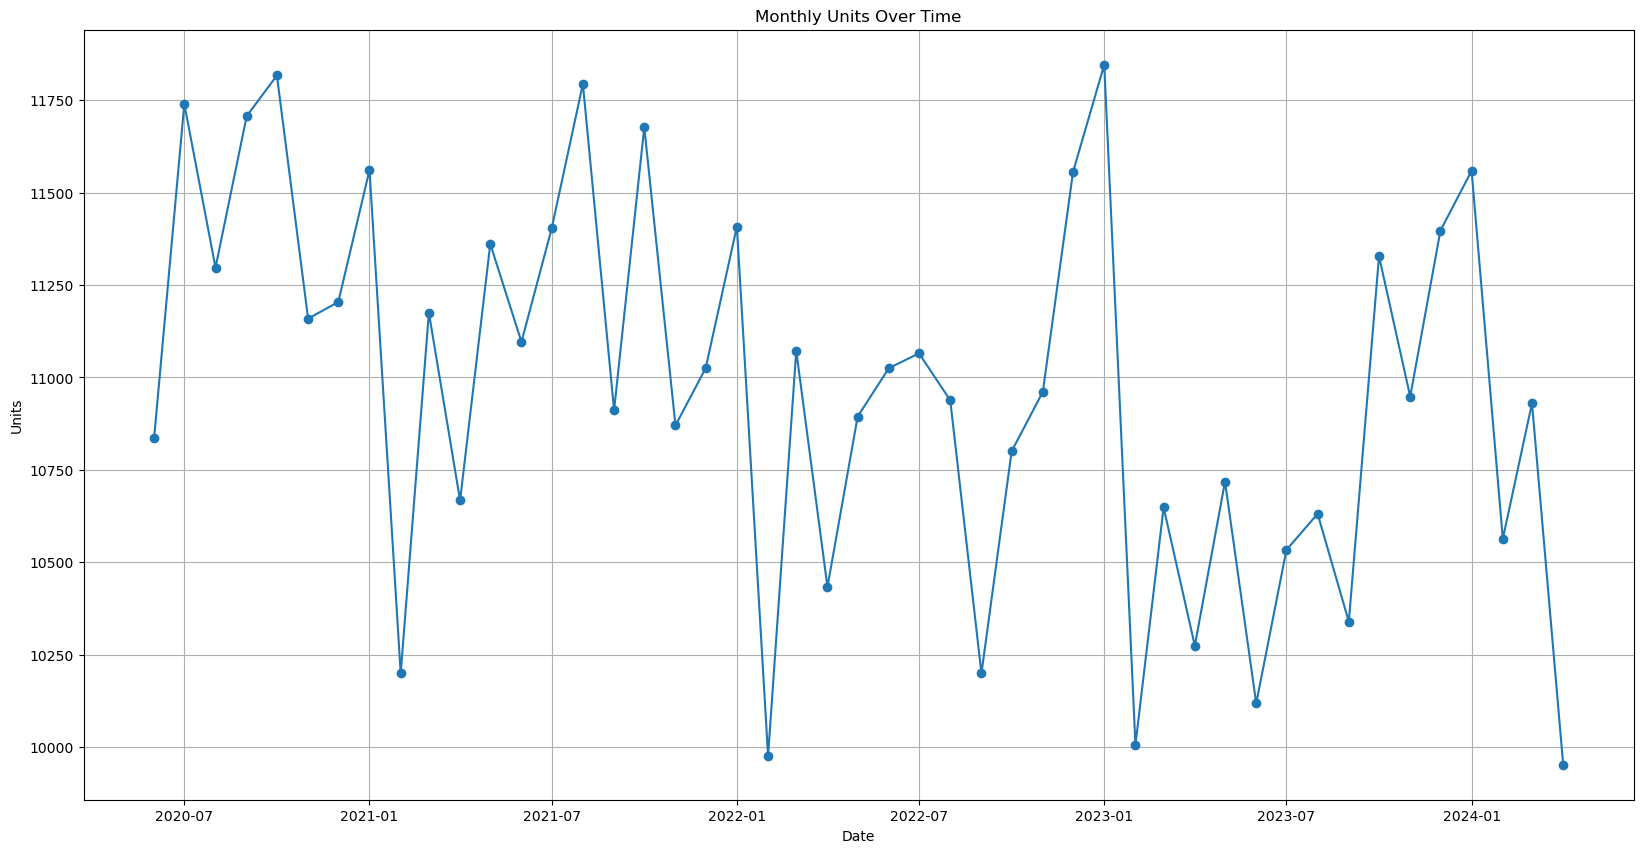

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(df["MONTHLY"], df['UNITS'], marker='o', linestyle='-')
plt.title('Monthly Units Over Time')
plt.xlabel('Date')
plt.ylabel('Units')
plt.grid(True)
plt.show()

In [12]:
df.describe()

,MONTHLY,UNITS
count,47,47.000000
mean,2022-05-01 22:28:05.106383104,10970.553191
min,2020-06-01 00:00:00,9952.000000
25%,2021-05-16 12:00:00,10639.500000
50%,2022-05-01 00:00:00,10961.000000
75%,2023-04-16 00:00:00,11379.000000
max,2024-04-01 00:00:00,11846.000000
std,NaN,527.545210


In [13]:
df.rename(columns={"MONTHLY": "ds", "UNITS": "y"}, inplace=True)
df["Month"] = df["ds"].dt.month
base = df.copy()
base['predicted'] = base['y'].mean()
mae = mean_absolute_error(base['y'], base['predicted'])
mse = mean_squared_error(base['y'], base['predicted'])
print(f'Baseline Model MAE: {mae:.2f}, MSE: {mse:.2f}')

Baseline Model MAE: 423.37, MSE: 272382.59


In [14]:
train_num = int(len(df) *.80)

train = df.iloc[:train_num]
test = df.iloc[train_num:]
test.head(2)

,ds,y,Month
51,2023-07-01,10533.0,7
52,2023-08-01,10631.0,8


In [15]:
model = Prophet(
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=0.05,
    )

model.add_country_holidays(country_name="US")
#model.add_regressor("Month")
model.add_seasonality(name='monthly', period=30.5, fourier_order=3)



# Fitting the model on the TRAINED data.
model.fit(train)
forecast_test = model.predict(test)
y_true = test['y'].values   # rep actual values
y_pred = forecast_test['yhat'].values   # rep pred values

# Calculating the final error metrics.
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
print(f'Final Model MAE: {mae:.2f}, MSE: {mse:.2f}')


09:51:31 - cmdstanpy - INFO - Chain [1] start processing
09:51:32 - cmdstanpy - INFO - Chain [1] done processing


Final Model MAE: 395.92, MSE: 215862.23


In [16]:
# predictions on both train and test data
forecast_train = model.predict(train)
forecast_test = model.predict(test)

In [17]:
# residuals for training data
train_residuals = train['y'].values - forecast_train['yhat'].values

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model on training residuals
arima_model = ARIMA(train_residuals, order=(4,0,2))
arima_results = arima_model.fit()

# ARIMA predictions on test residuals
arima_forecast = arima_results.forecast(steps=len(test))

# Prophet and ARIMA predictions for test data
hybrid_forecast = forecast_test['yhat'].values + arima_forecast

# error metrics for the hybrid model
y_true = test['y'].values
mae_hybrid = mean_absolute_error(y_true, hybrid_forecast)
mse_hybrid = mean_squared_error(y_true, hybrid_forecast)
print(f'Hybrid Model MAE: {mae_hybrid:.2f}, MSE: {mse_hybrid:.2f}')

Hybrid Model MAE: 330.70, MSE: 163283.42


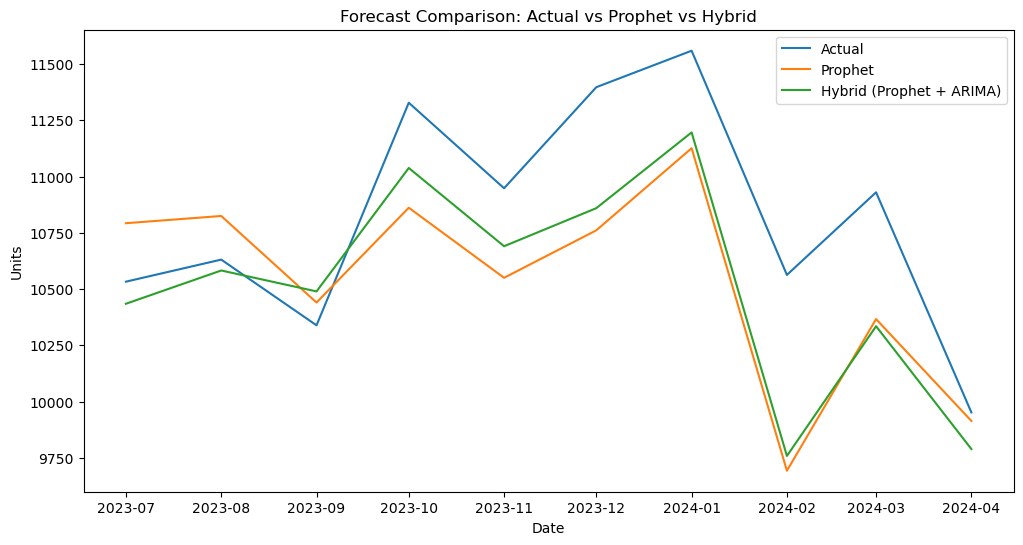

In [19]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], y_true, label='Actual')
plt.plot(test['ds'], forecast_test['yhat'], label='Prophet')
plt.plot(test['ds'], hybrid_forecast, label='Hybrid (Prophet + ARIMA)')
plt.legend()
plt.title('Forecast Comparison: Actual vs Prophet vs Hybrid')
plt.xlabel('Date')
plt.ylabel('Units')
plt.show()

In [20]:
# predictions for the last 3 months
future_dates = model.make_future_dataframe(periods=3, freq='M')
prophet_forecast = model.predict(future_dates)

# last 3 predictions
last_3_prophet = prophet_forecast.tail(3)

# ARIMA predictions for the last 3 months
arima_last_3 = arima_results.forecast(steps=3)

# Prophet and ARIMA predictions for the last 3 months
hybrid_last_3 = last_3_prophet['yhat'].values + arima_last_3

# actual values
print("Last 3 months comparison:")
print("Actual values:")
print(df_last3['UNITS'].values)
print("Hybrid model predictions:")
print(hybrid_last_3)

# error metrics for the last 3 months
mae_last_3 = mean_absolute_error(df_last3['UNITS'].values, hybrid_last_3)
mse_last_3 = mean_squared_error(df_last3['UNITS'].values, hybrid_last_3)
print(f'Last 3 months MAE: {mae_last_3:.2f}, MSE: {mse_last_3:.2f}')

Last 3 months comparison:
Actual values:
[ 9803. 10733. 10765.]
Hybrid model predictions:
[10322.92175359 10515.68337665 10299.52530129]
Last 3 months MAE: 400.90, MSE: 178070.61


c:\miniforge3\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
